In [1]:
import pandas as pd
import numpy as np
import pydicom
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from multiprocessing import Pool, cpu_count
from matplotlib import patches, patheffects
import math
from pathlib import Path

from fastaiold.dataset import *
from fastaiold.conv_learner import *
from fastaiold.imports import *
from fastaiold.structured import *

from scipy.special import expit

import pdb

import pickle
from sklearn.model_selection import train_test_split

from IPython.display import FileLink
% load_ext autoreload
% autoreload 2
% matplotlib inline

In [9]:
ddir = '/home/edwin/Datasets/competitions/human-protein-atlas-image-classification'

In [48]:
sample_csv_path = '../tmp/trn_sample.csv'

In [10]:
protein_path = Path(ddir)

In [11]:
TRN_PATH = protein_path/'train'

In [12]:
TEST_PATH = protein_path/'test'

In [12]:
TRN_IMAGES = list(TRN_PATH.iterdir())

In [13]:
!ls {protein_path}

sample_submission.csv  test  test.zip  train  train.csv  train.zip


In [43]:
TRN_CSV = pd.read_csv(protein_path/'train.csv')

In [16]:
TRN_CSV.sample()

,Id,Target
21537,b1bd2574-bb9c-11e8-b2b9-ac1f6b6435d0,25 13


In [18]:
def f1_score():
    #
    return

In [45]:
n_sample = int(0.10 * len(TRN_CSV))

In [46]:
TRN_CSV_SAMPLE = TRN_CSV.sample(n=n_sample)

In [47]:
TRN_CSV_SAMPLE.head(n=1000)

,Id,Target
6384,3531e0f6-bbad-11e8-b2ba-ac1f6b6435d0,21
30069,f7ad101c-bb9c-11e8-b2b9-ac1f6b6435d0,2
18943,9c9602ca-bba5-11e8-b2ba-ac1f6b6435d0,23
22240,b796ea26-bbb9-11e8-b2ba-ac1f6b6435d0,25
2714,169abc84-bba9-11e8-b2ba-ac1f6b6435d0,4
8459,463eaa36-bbbd-11e8-b2ba-ac1f6b6435d0,21
22503,b99a8e06-bb99-11e8-b2b9-ac1f6b6435d0,19 25
5272,2bda9976-bbad-11e8-b2ba-ac1f6b6435d0,25
11820,62246694-bbab-11e8-b2ba-ac1f6b6435d0,6
29970,f6e40380-bbaf-11e8-b2ba-ac1f6b6435d0,6


In [30]:
TRN_CSV_SAMPLE.to_csv('../tmp/trn_sample.csv', index=False)

In [47]:
TRN_CSV_SAMPLE.Id.values

array(['c6a684e8-bbb1-11e8-b2ba-ac1f6b6435d0', '6dc729a4-bba7-11e8-b2ba-ac1f6b6435d0',
       '53fefaa6-bb9d-11e8-b2b9-ac1f6b6435d0', ..., '785eb434-bbbd-11e8-b2ba-ac1f6b6435d0',
       '302d3c44-bbae-11e8-b2ba-ac1f6b6435d0', '88c3e902-bbc7-11e8-b2bc-ac1f6b6435d0'], dtype=object)

In [48]:
# Filenames for Each
# 6282e938-bba3-11e8-b2b9-ac1f6b6435d0_blue.png   6282e938-bba3-11e8-b2b9-ac1f6b6435d0_red.png
# 6282e938-bba3-11e8-b2b9-ac1f6b6435d0_green.png  6282e938-bba3-11e8-b2b9-ac1f6b6435d0_yellow.png

In [49]:
# should take an id
# look at each of the four images
# predict Target

In [27]:
f_model=resnet34
sz=224
bs=64
tfms = tfms_from_model(f_model, sz)

In [29]:
protein_path

PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification')

In [155]:
md = ImageClassifierData.from_csv(protein_path, 'train', '../tmp/trn_sample.csv', bs=64, tfms=tfms, suffix='.png')

In [156]:
md.trn_ds.y

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

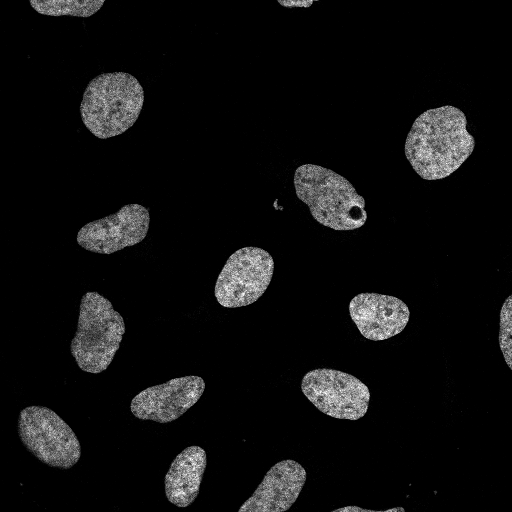

In [36]:
sample_img = TRN_PATH/'6282e938-bba3-11e8-b2b9-ac1f6b6435d0_blue.png'
Image.open(sample_img)

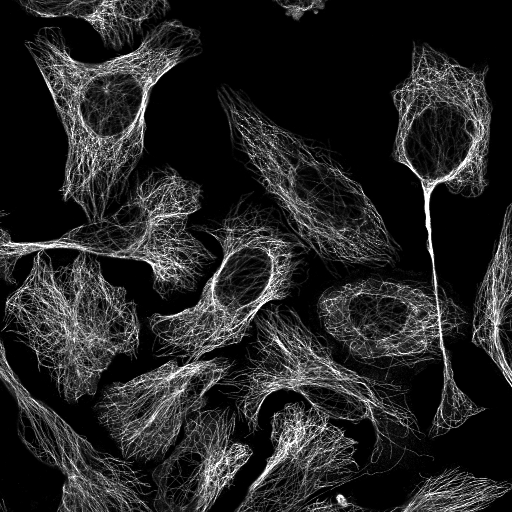

In [37]:
sample_img = TRN_PATH/'6282e938-bba3-11e8-b2b9-ac1f6b6435d0_red.png'
Image.open(sample_img)

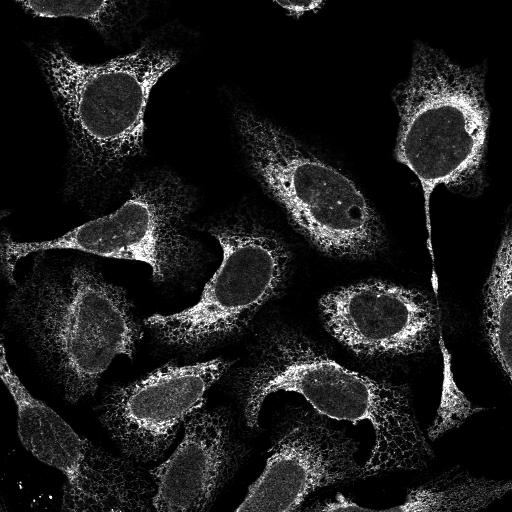

In [39]:
sample_img = TRN_PATH/'6282e938-bba3-11e8-b2b9-ac1f6b6435d0_yellow.png'
Image.open(sample_img)

In [42]:
# samples consist of four files - blue, green, red, and yellow
# labels assigned to each sample

In [44]:
# Key
# 0.  Nucleoplasm  
# 1.  Nuclear membrane   
# 2.  Nucleoli   
# 3.  Nucleoli fibrillar center   
# 4.  Nuclear speckles   
# 5.  Nuclear bodies   
# 6.  Endoplasmic reticulum   
# 7.  Golgi apparatus   
# 8.  Peroxisomes   
# 9.  Endosomes   
# 10.  Lysosomes   
# 11.  Intermediate filaments   
# 12.  Actin filaments   
# 13.  Focal adhesion sites   
# 14.  Microtubules   
# 15.  Microtubule ends   
# 16.  Cytokinetic bridge   
# 17.  Mitotic spindle   
# 18.  Microtubule organizing center   
# 19.  Centrosome   
# 20.  Lipid droplets   
# 21.  Plasma membrane   
# 22.  Cell junctions   
# 23.  Mitochondria   
# 24.  Aggresome   
# 25.  Cytosol   
# 26.  Cytoplasmic bodies   
# 27.  Rods & rings

In [50]:
df = TRN_CSV_SAMPLE

In [51]:
df.iloc[0].Target

'19 23'

In [55]:
protein_path/'train'

PosixPath('/home/edwin/Datasets/competitions/human-protein-atlas-image-classification/train')

In [195]:
class ProteinDataset(Dataset):
    def __init__(self, df, path, trn_folder):
        self.path = path
        self.trn_folder = self.path/trn_folder
        self.df = df
        self.sz = 224
        self.c = 28
        self.is_multi = True
        self.is_reg = False
        
    def __len__(self):
        return len(df)
    
    def __getitem__(self, i):
        key = self.df.iloc[i].Id
        
        red = f"{self.trn_folder/key}_red.png"
        red_img = open_image(red)
        
        green = f"{self.trn_folder/key}_green.png"
        green_img = open_image(green)
        
        blue = f"{self.trn_folder/key}_blue.png"
        blue_img = open_image(blue)
        
        yellow = f"{self.trn_folder/key}_green.png"
        yellow_img = open_image(yellow)
        
        x = (red_img, green_img, blue_img, yellow_img)
        
        # call transform here
        x_transform = tuple(list(map(lambda x: scale_min(x, 224), x)))
        x_transform = torch.from_numpy(np.asarray(x_transform))
        
        y = tuple(self.df.iloc[i].Target.split(" "))
        y = tuple(list(map(lambda x: int(x), y)))
        
        y = torch.from_numpy(np.asarray(y))
        
        return (x_transform, y)

In [196]:
protein_ds = ProteinDataset(TRN_CSV_SAMPLE, protein_path, 'train')


In [197]:
md.trn_dl.dataset = protein_ds

In [202]:
trn_dl = DataLoader(protein_ds, batch_size=32, shuffle=False, num_workers=4)

In [203]:
x, y = trn_dl

TypeError: batch must contain numbers, dicts or lists; found <class 'torch.Tensor'>

In [199]:
x, y = next(iter(md.trn_dl))

TypeError: batch must contain numbers, dicts or lists; found <class 'torch.Tensor'>

In [129]:
len(md.trn_dl)

39

In [130]:
len (md.trn_dl.dataset)

3107

In [131]:
x, y = next(iter(md.trn_dl.dataset))

In [172]:
learn = ConvLearner.pretrained(f_model, md)

In [173]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

  0%|          | 0/39 [00:00<?, ?it/s]

ValueError: only one element tensors can be converted to Python scalars

In [84]:
im = x[0]

In [85]:
im.shape

(512, 512, 3)

In [86]:
r, c, *_ = im.shape

In [87]:
r

512

In [88]:
c

512

In [97]:
scale_min(im, 224)

(224, 224, 3)

In [134]:
md.trn_ds.sz

AttributeError: 'ProteinDataset' object has no attribute 'sz'

In [138]:
md.c

26

In [139]:
?? ImageClassifierData

In [1]:
pd

NameError: name 'pd' is not defined

In [3]:
space_ddir = Path('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space')

In [4]:
list(space_ddir.iterdir())

[PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/train-tif-v2.tar.7z'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/test-jpg-additional.tar.7z'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/test-jpg.tar.7z'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/Kaggle-planet-train-tif.torrent'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/test-tif-v2.tar.7z'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/test_v2_file_mapping.csv.zip'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/sample_submission_v2.csv.zip'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understanding-the-amazon-from-space/Kaggle-planet-test-tif.torrent'),
 PosixPath('/home/edwin/Datasets/competitions/planet-understa

In [5]:
space_csv = pd.read_csv(space_ddir/'train_v2.csv')

In [6]:
space_csv.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [7]:
def load_image(basepath, image_id):
    images = np.zeros(shape=(4,512,512))
    images[0,:,:] = imread(basepath + image_id + "_green" + ".png")
    images[1,:,:] = imread(basepath + image_id + "_red" + ".png")
    images[2,:,:] = imread(basepath + image_id + "_blue" + ".png")
    images[3,:,:] = imread(basepath + image_id + "_yellow" + ".png")
    return images

In [15]:
im = open_image(TRN_PATH/'6282e938-bba3-11e8-b2b9-ac1f6b6435d0_red.png')

In [18]:
im2 = imread(TRN_PATH/'6282e938-bba3-11e8-b2b9-ac1f6b6435d0_red.png')

/home/edwin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


In [16]:
im.shape

(512, 512, 3)

In [17]:
from scipy.misc import imread

In [21]:
s = np.zeros(shape=(4,512,512))

In [27]:
s[0,:,:] = im[:,:,0]

In [33]:
?? open_image

In [34]:
?? cv2.merge

In [35]:
r = open_image(TRN_PATH/'6282e938-bba3-11e8-b2b9-ac1f6b6435d0_red.png')
g = open_image(TRN_PATH/'6282e938-bba3-11e8-b2b9-ac1f6b6435d0_green.png')

In [37]:
cv2.merge(r, g).shape

(512, 3, 512)

In [38]:
?? ImageData.get_ds

In [104]:
class ProteinDataset(FilesNhotArrayDataset):
    def __init__(self, fnames, y, transform, path):
        self.y = y
        self.fnames = fnames
        super().__init__(fnames, y, transform, path)
    def get_x(self, i):
        # todo: learn how to join all images here
        key = self.fnames[i].split("/")[-1].split('.png')[0]
        
        return open_image(f"{self.path}/train/{key}_green.png")

In [41]:
tfms = tfms_from_model(resnet34, 224)

In [49]:
sample_csv = pd.read_csv(sample_csv_path)

In [50]:
sample_csv.columns

Index(['Id', 'Target'], dtype='object')

In [55]:
fnames, y, classes = csv_source(protein_path, sample_csv_path, suffix='.png')

In [62]:
sz = 224

In [66]:
tfms

([<fastaiold.transforms.Scale object at 0x7ff76cfe7da0>, <fastaiold.transforms.RandomCrop object at 0x7ff76cfe7e48>, <fastaiold.transforms.Normalize object at 0x7ff76cfe7278>, <fastaiold.transforms.ChannelOrder object at 0x7ff76cfe7e80>],
 [<fastaiold.transforms.Scale object at 0x7ff76cfe73c8>, <fastaiold.transforms.CenterCrop object at 0x7ff76cfe72e8>, <fastaiold.transforms.Normalize object at 0x7ff76cfe7278>, <fastaiold.transforms.ChannelOrder object at 0x7ff76cfe7fd0>])

In [81]:
x_names = np.array(fnames)

In [82]:
y_names = np.array(y)

In [75]:
len(fnames)

3107

In [78]:
val_idxs = list(range(int(0.10 * 3107)))

In [76]:
len(y)

3107

In [85]:
((val_x, trn_x), (val_y, trn_y)) = split_by_idx(val_idxs, x_names, y_names)

In [88]:
len(val_x), len(trn_x)

(310, 2797)

In [102]:
datasets = ImageData.get_ds(ProteinDataset, (trn_x, trn_y), (val_x, val_y), tfms, path=protein_path)

In [103]:
datasets[0][0]

(array([[[-2.1179 , -2.1179 , -2.1179 , ..., -2.11616, -2.1179 , -2.1179 ],
         [-2.1179 , -2.1179 , -2.1179 , ..., -2.10794, -2.1179 , -2.1179 ],
         [-2.1179 , -2.1179 , -2.1179 , ..., -2.1179 , -2.1179 , -2.1179 ],
         ...,
         [-2.1179 , -2.1179 , -2.1179 , ..., -2.1179 , -2.1179 , -2.1179 ],
         [-2.1179 , -2.1179 , -2.1179 , ..., -2.11556, -2.1179 , -2.1179 ],
         [-2.1179 , -2.1179 , -2.1179 , ..., -2.11697, -2.1179 , -2.1179 ]],
 
        [[-2.03571, -2.03571, -2.03571, ..., -2.03394, -2.03571, -2.03571],
         [-2.03571, -2.03571, -2.03571, ..., -2.02552, -2.03571, -2.03571],
         [-2.03571, -2.03571, -2.03571, ..., -2.03571, -2.03571, -2.03571],
         ...,
         [-2.03571, -2.03571, -2.03571, ..., -2.03571, -2.03571, -2.03571],
         [-2.03571, -2.03571, -2.03571, ..., -2.03332, -2.03571, -2.03571],
         [-2.03571, -2.03571, -2.03571, ..., -2.03476, -2.03571, -2.03571]],
 
        [[-1.80444, -1.80444, -1.80444, ..., -1.80267,

In [94]:
% debug

> /home/edwin/Developer/kaggle-comps/nbs/fastaiold/transforms.py(12)scale_min()
     10         targ (int): target size
     11     """
---> 12     r,c,*_ = im.shape
     13     ratio = targ/min(r,c)
     14     sz = (scale_to(c, ratio, targ), scale_to(r, ratio, targ))

ipdb> int
<class 'int'>
ipdb> a
im = 0
targ = 224
interpolation = 3
ipdb> exit
